## conectando no cassandra com spark session

In [ ]:
from pyspark.sql import SparkSession, DataFrame
from pyspark.sql.functions import *

In [ ]:
from pyspark.sql.types import *
import pandas as pd

In [ ]:
spark = SparkSession.builder\
    .appName('AtividadeFinal')\
    .config("spark.jars.packages", "com.datastax.spark:spark-cassandra-connector_2.12:3.1.0")\
    .config("spark.sql.extensions","com.datastax.spark.connector.CassandraSparkExtensions") \
    .config("spark.cassandra.connection.host","35.185.240.198") \
    .config("spark.cassandra.connection.port","9042") \
    .config("spark.cassandra.output.batch.grouping.buffer.size", "3000") \
    .config("spark.cassandra.output.concurrent.writes", "1500") \
    .config("cassandra.output.throughput_mb_per_sec", "128") \
    .config("spark.cassandra.output.batch.size.bytes", "2056") \
    .config("cassandra.connection.keep_alive_ms", "30000") \
    .config("spark.sql.caseSensitive", "True")\
    .getOrCreate()
    

## lendo arquivos do cassandra da nuvem

In [ ]:
data = spark.read.format("org.apache.spark.sql.cassandra")\
    .options(table = 'panorama_geral_petr_distribuidora', keyspace = 'atividade_final').load()  

In [ ]:
data.show()

+--------------------+----------------+---------------------------+--------+
|            id_distr|  distribuidoras|participacao_distribuidoras| produto|
+--------------------+----------------+---------------------------+--------+
|b9a19fa6-7349-47a...|         Flórida|       0.000246999989030883|GASOLINA|
|07bbde6c-1f28-471...|Uni Combustíveis|       0.000037000001611887|GASOLINA|
|ed6da3e7-b0ac-4fa...|         Dibrape|       0.001599999959580600|GASOLINA|
|7b336acc-1b00-413...|          D'Mais|       0.002732000080868602|GASOLINA|
|9afb6ff2-799d-4a2...|          Torrão|       0.003134999889880419|GASOLINA|
|f8c24088-1aed-43c...|          Podium|       0.000638000026810914|  DIESEL|
|bac1dff5-e97c-4db...|        Imperial|       0.003592000110074878|  DIESEL|
|c22b0760-4446-45c...|    Petro Amazon|       0.000014999999621068|GASOLINA|
|c8c13e80-c83a-432...|           Larco|       0.012117000296711922|  DIESEL|
|c3261a11-8b2c-47a...|        Danpetro|       0.000639999983832240|GASOLINA|

## tratando dados vindos do cassandra, retirando o uuid

In [ ]:
data1 = data.drop('id_distr')


In [ ]:
data1.count()

288

## criando um dataframe spark com dados dos 5 maiores distribuidores de gasolina

In [ ]:
data_gasolina = data1.filter(data1.produto == 'GASOLINA') \
                .orderBy(desc('participacao_distribuidoras')).limit(5)\
                .withColumn('porcentagem', lit(0)).collect() #criando uma coluna com o nome porcentagem para receber o valor inteiro

                

In [ ]:
data_gasolina

DataFrame[distribuidoras: string, participacao_distribuidoras: decimal(38,18), produto: string, porcentagem: int]

## transformando data_gasolina em dataframe do pandas

In [ ]:
dados_dist_maiores_glina = pd.DataFrame(data_gasolina)

In [ ]:
dados_dist_maiores_glina.columns = ['distribuidoras', 'participacao_distribuidoras', 'produto', 'porcentagem']
dados_dist_maiores_glina['porcentagem'] = pd.to_numeric(dados_dist_maiores_glina['porcentagem'], errors='coerce')
dados_dist_maiores_glina['participacao_distribuidoras'] = pd.to_numeric(dados_dist_maiores_glina['participacao_distribuidoras'], errors='coerce')
dados_dist_maiores_glina['porcentagem'] = (dados_dist_maiores_glina['participacao_distribuidoras'] * 100).round(2)


In [ ]:
dados_dist_maiores_glina.head()

,distribuidoras,participacao_distribuidoras,produto,porcentagem
0,BR,0.236957,GASOLINA,23.70
1,Ipiranga,0.179057,GASOLINA,17.91
2,Raízen,0.159763,GASOLINA,15.98
3,Alesat,0.042476,GASOLINA,4.25
4,Sabbá,0.022796,GASOLINA,2.28


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline


## grafico 5 maiores distribuidores gasolina (MATPLOTLIB)

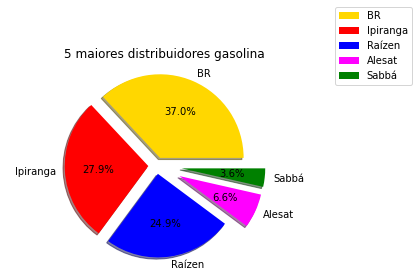

In [ ]:
import numpy as np
porcentagem = np.array(dados_dist_maiores_glina['porcentagem'])
dist = dados_dist_maiores_glina['distribuidoras']

cores=['gold', 'red', 'blue', 'magenta', 'green']
# o atributo explode indica que fatia do gráfico será destacada. 
explode = (0.1, 0.1, 0.1, 0.3, 0.3)  

# Atribuindo um título ao gráfico
plt.title('5 maiores distribuidores gasolina')

plt.pie(porcentagem, explode=explode, labels=dist, colors=cores, autopct='%1.1f%%', shadow=True, startangle=0)

#Adiciona Legenda
plt.legend(dist, bbox_to_anchor=(1.3, 1.3),loc='upper right')

#Centraliza o gráfico
plt.axis('equal')

#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()

plt.show()

## criando um dataframe spark com dados dos 5 maiores distribuidores de GLP

In [ ]:
data_glp = data1.filter(data1.produto == 'GLP').orderBy(desc('participacao_distribuidoras')).limit(5).withColumn('porcentagem', lit(0)).collect()



In [ ]:
dados_maiores_glp = pd.DataFrame(data_glp)
dados_maiores_glp.columns = ['distribuidoras', 'participacao_distribuidoras', 'produto', 'porcentagem']
dados_maiores_glp['porcentagem'] = pd.to_numeric(dados_maiores_glp['porcentagem'], errors='coerce')
dados_maiores_glp['participacao_distribuidoras'] = pd.to_numeric(dados_maiores_glp['participacao_distribuidoras'], errors='coerce')
dados_maiores_glp['porcentagem'] = (dados_maiores_glp['participacao_distribuidoras'] * 100).round(2)


In [ ]:
dados_maiores_glp.head()

,distribuidoras,participacao_distribuidoras,produto,porcentagem
0,Ultragaz¹,0.2306,GLP,23.06
1,Liquigás,0.2126,GLP,21.26
2,Supergasbras²,0.1999,GLP,19.99
3,Nacional Gás,0.1846,GLP,18.46
4,Copagaz,0.0872,GLP,8.72


## grafico 5 maiores distribuidores GLP (MATPLOTLIB)

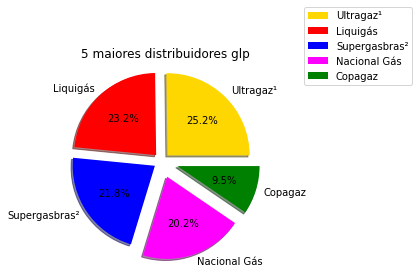

In [ ]:
import numpy as np
porcentagem = np.array(dados_maiores_glp['porcentagem'])
dist = dados_maiores_glp['distribuidoras']

cores=['gold', 'red', 'blue', 'magenta', 'green']
# o atributo explode indica que fatia do gráfico será destacada. No exemplo abaixo, será a primeira fatia. A quantidade de valores é igual ao número de fatias do gráfico. 
explode = (0.1, 0.1, 0.1, 0.2, 0.2)  # explode 1st slice

# Atribuindo um título ao gráfico
plt.title('5 maiores distribuidores glp')

plt.pie(porcentagem, explode=explode, labels=dist, colors=cores, autopct='%1.1f%%', shadow=True, startangle=0)

#Adiciona Legenda
plt.legend(dist, bbox_to_anchor=(1.3, 1.3),loc='upper right')

#Centraliza o gráfico
plt.axis('equal')

#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()

plt.show()

## criando um dataframe spark com dados dos 5 maiores distribuidores de DIESEL

In [ ]:
data_diesel = data1.filter(data1.produto == 'DIESEL').orderBy(desc('participacao_distribuidoras')).limit(5).withColumn('porcentagem', lit(0)).collect()



In [ ]:
dados_maiores_diesel = pd.DataFrame(data_diesel)
dados_maiores_diesel.columns = ['distribuidoras', 'participacao_distribuidoras', 'produto', 'porcentagem']
dados_maiores_diesel['porcentagem'] = pd.to_numeric(dados_maiores_diesel['porcentagem'], errors='coerce')
dados_maiores_diesel['participacao_distribuidoras'] = pd.to_numeric(dados_maiores_diesel['participacao_distribuidoras'], errors='coerce')
dados_maiores_diesel['porcentagem'] = (dados_maiores_diesel['participacao_distribuidoras'] * 100).round(2)

In [ ]:
dados_maiores_diesel.head()

,distribuidoras,participacao_distribuidoras,produto,porcentagem
0,BR,0.276690,DIESEL,27.67
1,Ipiranga,0.193921,DIESEL,19.39
2,Raízen,0.183563,DIESEL,18.36
3,Alesat,0.034127,DIESEL,3.41
4,Sabbá,0.030019,DIESEL,3.00


## grafico 5 maiores distribuidores diesel (plotly)


In [ ]:
import plotly.express as px


In [ ]:
fig = px.bar(dados_maiores_diesel, y = 'distribuidoras', x = 'porcentagem', width = 800, height = 500, 
       title = '5 maiores distribuidores de diesel', color = 'distribuidoras')
fig.show()
 
         